In [34]:
# Importing the necessary modules

import pandas as pd
import numpy as np
import seaborn as sns
from pandas import read_csv, get_dummies, Series
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
import plotly.graph_objs as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
# https://archive.ics.uci.edu/ml/datasets/Steel+Industry+Energy+Consumption+Dataset

In [141]:
#suppress warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#read in the dataset
df = pd.read_csv("steel_industry_data.csv")

In [ ]:
pd.set_option('display.max_columns', None) # to make sure you can see all the columns in output window
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

In [6]:
# setting the date column as the dataframe index
df['date']=pd.to_datetime(df["date"],format = "%d/%m/%Y %H:%M")
df.set_index("date",inplace= True)

In [9]:
#df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
date,,,,,,,,,,
2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [32]:
# Data preprocessing, checking for null and NaNs
print(df.isnull().sum())

Usage          0
Lag_RP         0
Lead_RP        0
CO2            0
Lag_PF         0
Lead_PF        0
NSM            0
WeekStatus     0
Day_of_week    0
Load_Type      0
dtype: int64


In [33]:
print(df.isna().sum()) #check for NaN

Usage          0
Lag_RP         0
Lead_RP        0
CO2            0
Lag_PF         0
Lead_PF        0
NSM            0
WeekStatus     0
Day_of_week    0
Load_Type      0
dtype: int64


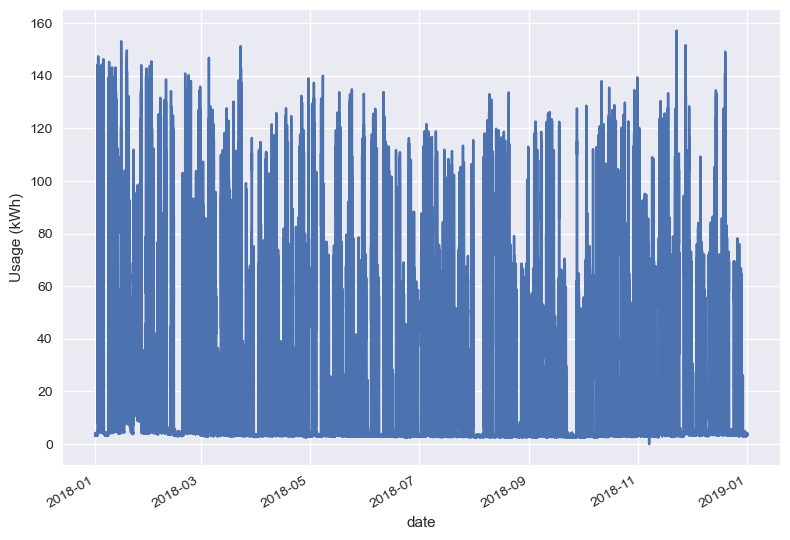

In [183]:
df['Usage'].plot()
plt.ylabel('Usage (kWh)')
plt.tight_layout()
#plt.savefig('usage.png', format='png')

In [14]:
print(df.columns) #checking column names

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [15]:
# Renaming column names to shorter abbreviations
df = df.rename(columns = {'Usage_kWh': 'Usage', 'Lagging_Current_Reactive.Power_kVarh' : 'Lag_RP',
       'Leading_Current_Reactive_Power_kVarh': 'Lead_RP', 'CO2(tCO2)': 'CO2',
       'Lagging_Current_Power_Factor': 'Lag_PF', 'Leading_Current_Power_Factor':'Lead_PF'})

In [16]:
print(df.columns)

Index(['Usage', 'Lag_RP', 'Lead_RP', 'CO2', 'Lag_PF', 'Lead_PF', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')


In [19]:
#correlation of each variable
print(df.corr())

            Usage    Lag_RP   Lead_RP       CO2    Lag_PF   Lead_PF       NSM
Usage    1.000000  0.896150 -0.324922  0.988180  0.385960  0.353566  0.234610
Lag_RP   0.896150  1.000000 -0.405142  0.886948  0.144534  0.407716  0.082662
Lead_RP -0.324922 -0.405142  1.000000 -0.332777  0.526770 -0.944039  0.371605
CO2      0.988180  0.886948 -0.332777  1.000000  0.379605  0.360019  0.231726
Lag_PF   0.385960  0.144534  0.526770  0.379605  1.000000 -0.519967  0.565270
Lead_PF  0.353566  0.407716 -0.944039  0.360019 -0.519967  1.000000 -0.360563
NSM      0.234610  0.082662  0.371605  0.231726  0.565270 -0.360563  1.000000


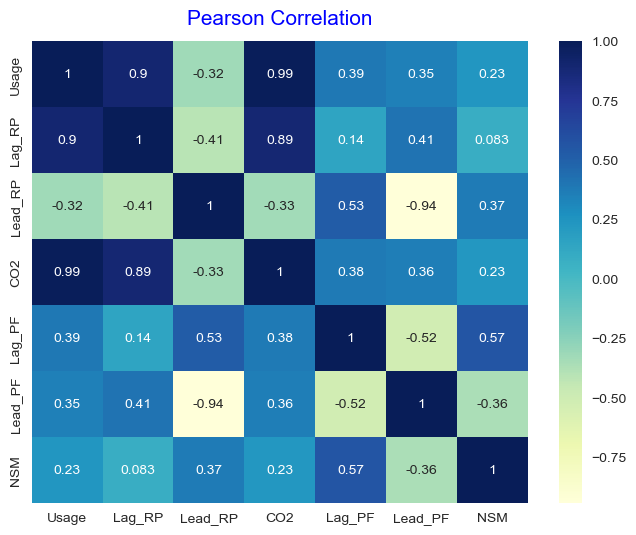

In [167]:
#visualize the correlation using pearson correlation
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.title("Pearson Correlation", fontsize = 15, color = 'b', pad = 12, loc = 'center')
#plt.savefig('feat_corr1.png')
plt.show()

In [17]:
''' Creating a list of the categorical features '''
obj_cols = []
for i in df:
     if df[i].dtypes == 'object':
        obj_cols.append(i)

In [18]:
#printing the categorical features
for k in obj_cols:
    print(k, ":", df[k].nunique())

WeekStatus : 2
Day_of_week : 7
Load_Type : 3


In [21]:
'''
Convert categorical data to numerical

One-hot encoding the categorical variables
'''
categorical_features = ['WeekStatus','Day_of_week','Load_Type']

dataset = pd.get_dummies(df, columns=categorical_features)
dataset.head()

,Usage,Lag_RP,Lead_RP,CO2,Lag_PF,Lead_PF,NSM,WeekStatus_Weekday,WeekStatus_Weekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
date,,,,,,,,,,,,,,,,,,,
2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,1,0,0,1,0,0,0,0,0,1,0,0
2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,1,0,0,1,0,0,0,0,0,1,0,0
2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,1,0,0,1,0,0,0,0,0,1,0,0
2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,0,0,1,0,0,0,0,0,1,0,0
2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,1,0,0,1,0,0,0,0,0,1,0,0


In [184]:
print(dataset.shape)

(35040, 19)


In [23]:
print(dataset.columns) #printing the dataset coluns to confirm the encoding process

Index(['Usage', 'Lag_RP', 'Lead_RP', 'CO2', 'Lag_PF', 'Lead_PF', 'NSM',
       'WeekStatus_Weekday', 'WeekStatus_Weekend', 'Day_of_week_Friday',
       'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday',
       'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday',
       'Load_Type_Light_Load', 'Load_Type_Maximum_Load',
       'Load_Type_Medium_Load'],
      dtype='object')

In [174]:
# Plotting Correlation Heatmap for the dataset
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
#figure.write_image("corr.png")
figure.show()

In [25]:
X = dataset.drop(['Usage'], axis = 1) # Features
y = dataset['Usage'] # Labels
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

In [26]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
print(X_scaled.head())

,Lag_RP,Lead_RP,CO2,Lag_PF,Lead_PF,NSM,WeekStatus_Weekday,WeekStatus_Weekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,-0.618516,-0.521385,-0.71355,-0.389410,0.513268,-1.678015,0.631243,-0.631243,-0.407596,2.426271,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,0.968974,-0.511746,-0.618527
1,-0.525911,-0.521385,-0.71355,-0.729772,0.513268,-1.641929,0.631243,-0.631243,-0.407596,2.426271,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,0.968974,-0.511746,-0.618527
2,-0.598278,-0.521385,-0.71355,-0.544264,0.513268,-1.605843,0.631243,-0.631243,-0.407596,2.426271,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,0.968974,-0.511746,-0.618527
3,-0.581106,-0.521385,-0.71355,-0.660009,0.513268,-1.569756,0.631243,-0.631243,-0.407596,2.426271,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,0.968974,-0.511746,-0.618527
4,-0.523458,-0.521385,-0.71355,-0.838117,0.513268,-1.533670,0.631243,-0.631243,-0.407596,2.426271,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,0.968974,-0.511746,-0.618527


In [31]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24528, 18)
(24528,)
(10512, 18)
(10512,)


In [35]:
# Using a helper function to print model metrics
def print_metrics(y_test, pred):  
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print('MAE:', mae)
    print('MSE:', mse)
    print('R2:', r2)
    print('')

In [36]:
# A function to save model metrics
def save_metrics(y_test,pred):
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    return mae, mse, r2

In [42]:
# creating a function to create adjusted R-Squared

def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r2

## We will begin by implementing a baseline Linear Regression (LR) model

In [38]:
# Fitting the LR model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [40]:
# Prediction using the testing and training data
lr_pred = lr.predict(X_test)
lr_pred_train = lr.predict(X_train)

In [44]:
print('Metrics for testing data:\n')
print_metrics(y_test, lr_pred)
print('Metrics for training data:\n')
print_metrics(y_train, lr_pred_train)

Metrics for testing data:

MAE: 2.5535445213317196
MSE: 17.774193845255017
R2: 0.9841638817921283

Metrics for training data:

MAE: 2.623404281286807
MSE: 23.70301455569002
R2: 0.9787757058329211



In [60]:
# saving the LR metrics
lr_mae, lr_mse, lr_r2 = save_metrics(y_test, lr_pred)

In [97]:
# Printing the adjusted R^2 for the LR model
print('###########################\n Adjusted R^2 for LR model \n##########################')
print(adj_r2(X_train, y_train, lr))

###########################
 Adjusted R^2 for LR model 
##########################
0.9787601182000104


In [78]:
# Extracting the LR coefficients and sorting in ascending order
# lr_feature = pd.DataFrame(lr.coef_, index=X.columns, columns=['coef']).sort_values(['coef'], ascending=False)

In [82]:
lr_feature = pd.DataFrame(zip(X.columns, lr.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False)
print(lr_feature)

,Features,Coefficients
15,Load_Type_Light_Load,1.827896e+13
17,Load_Type_Medium_Load,1.636315e+13
16,Load_Type_Maximum_Load,1.483311e+13
6,WeekStatus_Weekday,1.305982e+12
11,Day_of_week_Sunday,1.025553e+12
10,Day_of_week_Saturday,1.025553e+12
2,CO2,2.627583e+01
0,Lag_RP,5.567480e+00
3,Lag_PF,2.388292e+00
4,Lead_PF,1.889144e+00


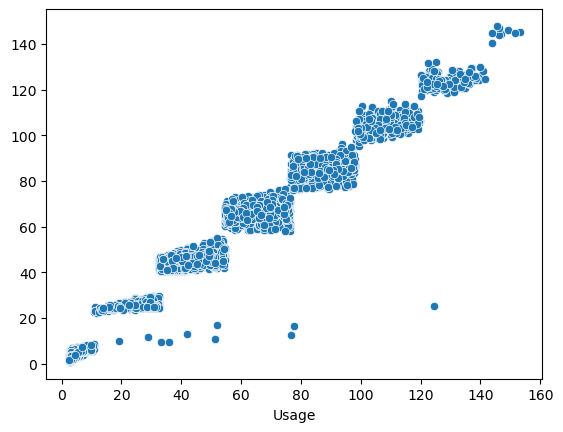

In [48]:
sns.scatterplot(x=y_test, y=lr_pred);

In [49]:
train_sizes=[1,101,203,304,404]

In [50]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(),
X = X,
y = y, 
train_sizes = train_sizes, 
cv = 5, 
shuffle=True,
scoring = 'neg_mean_squared_error',random_state=17)

In [51]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis =1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1      -0.000000
101    14.703888
203    14.511400
304    15.213866
404    15.333685
dtype: float64

Mean validation scores

 1      1597.285094
101      25.320653
203      24.101064
304      23.536790
404      23.150997
dtype: float64


(0.0, 404.0)

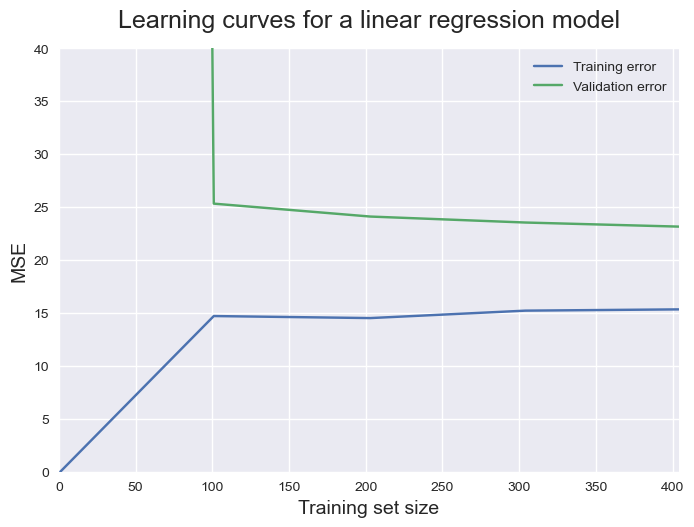

In [52]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)
plt.xlim(0,404)

## There is a problem of high variance. Let's try to eliminate it with the help of regularization.

## SGDRegressor

In [54]:
sgd = SGDRegressor(random_state=0, tol=.0001)
sgd_params = {'alpha':[.001, .0015, .01, .015, .1, 1, 10, 100],
             'eta0':[.001, .003, .01, .03, .1, .3, 1, 3]
             }

In [61]:
%%time
gs_sgd = GridSearchCV(sgd, sgd_params, cv=5, n_jobs=-1, verbose=1, scoring='r2')
gs_sgd.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   27.5s finished


Wall time: 27.9 s


GridSearchCV(cv=5, estimator=SGDRegressor(random_state=0, tol=0.0001),
             n_jobs=-1,
             param_grid={'alpha': [0.001, 0.0015, 0.01, 0.015, 0.1, 1, 10, 100],
                         'eta0': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]},
             scoring='r2', verbose=1)

In [62]:
sgd_best = gs_sgd.best_estimator_

In [63]:
# Prediction
sgd_pred = sgd_best.predict(X_test)
sgd_pred_train = sgd_best.predict(X_train)

In [64]:
print('Metrics for testing data:\n')
print_metrics(y_test, sgd_pred)
print('metrics for training data:\n')
print_metrics(y_train, sgd_pred_train)

Metrics for testing data:

MAE: 2.568298397969912
MSE: 17.86709351616535
R2: 0.9840811117839459

metrics for training data:

MAE: 2.636218217203045
MSE: 23.71323999256818
R2: 0.9787665497114589



In [65]:
# Saving the SGDRegressor metrics
sgd_mae, sgd_mse, sgd_r2 = save_metrics(y_test, sgd_pred)

In [81]:
#print(pd.DataFrame(zip(X.columns, sgd_best.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False))
sgd_feature = pd.DataFrame(zip(X.columns, sgd_best.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False)
print(sgd_feature)

,Features,Coefficients
2,CO2,26.048957
0,Lag_RP,5.702920
3,Lag_PF,2.479911
4,Lead_PF,1.953129
1,Lead_RP,0.500837
17,Load_Type_Medium_Load,0.447997
13,Day_of_week_Tuesday,0.203606
16,Load_Type_Maximum_Load,0.123959
11,Day_of_week_Sunday,0.070570
7,WeekStatus_Weekend,0.023673


In [98]:
# Printing the adjusted R^2 for the SGD model
print('###########################\n Adjusted R^2 for SGD model \n##########################')
print(adj_r2(X_train, y_train, sgd_best))

###########################
 Adjusted R^2 for SGD model 
##########################
0.9787509553540721


## SGDRegressor with Elastic Net Penalty

In [66]:
## SGDRegressor with Elastic Net Penalty tuning the SGDRegressor parameters 
#'eta0' (learning rate) and 'max_iter', along with the regularization parameter alpha using Grid Search
sgdr = SGDRegressor(random_state = 1, penalty = 'elasticnet')
grid_param = {'eta0': [.0001, .001, .01, .1, 1], 'max_iter':[1000, 2000, 3000],'alpha': [.001, .01, .1, 1,10, 100], 'l1_ratio': [0.25,0.5,0.75]}

gd_sr = GridSearchCV(estimator=sgdr, param_grid=grid_param, scoring='r2', cv=5)

gd_sr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(penalty='elasticnet', random_state=1),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'eta0': [0.0001, 0.001, 0.01, 0.1, 1],
                         'l1_ratio': [0.25, 0.5, 0.75],
                         'max_iter': [1000, 2000, 3000]},
             scoring='r2')

In [67]:
best_parameters = gd_sr.best_params_
print("Best parameters: ", best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print("r2: ", best_result)

Best parameters:  {'alpha': 0.001, 'eta0': 0.01, 'l1_ratio': 0.5, 'max_iter': 1000}
r2:  0.9786576603162512


In [68]:
sgd_en = gd_sr.best_estimator_

In [69]:
# Prediction
sgd_en_pred = sgd_en.predict(X_test)
sgd_en_pred_train = sgd_en.predict(X_train)

In [70]:
print('Metrics for testing data:\n')
print_metrics(y_test, sgd_en_pred)
print('metrics for training data:\n')
print_metrics(y_train, sgd_en_pred_train)

Metrics for testing data:

MAE: 2.5416955723985737
MSE: 17.791191423190714
R2: 0.9841487376086125

metrics for training data:

MAE: 2.6102934353307488
MSE: 23.733098735163033
R2: 0.9787487676781387



In [71]:
# Saving the SGDRegressor with EN metrics
sgd_en_mae, sgd_en_mse, sgd_en_r2 = save_metrics(y_test, sgd_en_pred)

In [73]:
print(pd.DataFrame(zip(X.columns, sgd_en.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False))

                  Features  Coefficients
2                      CO2     26.160153
0                   Lag_RP      5.617256
3                   Lag_PF      2.448988
4                  Lead_PF      1.920261
1                  Lead_RP      0.453810
17   Load_Type_Medium_Load      0.327769
13     Day_of_week_Tuesday      0.155197
16  Load_Type_Maximum_Load      0.109719
11      Day_of_week_Sunday      0.102426
6       WeekStatus_Weekday      0.000000
7       WeekStatus_Weekend      0.000000
8       Day_of_week_Friday      0.000000
10    Day_of_week_Saturday      0.000000
14   Day_of_week_Wednesday      0.000000
9       Day_of_week_Monday      0.000000
12    Day_of_week_Thursday     -0.038309
5                      NSM     -0.064801
15    Load_Type_Light_Load     -0.467581


In [83]:
#print(pd.DataFrame(zip(X.columns, sgd_best.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False))
sgd_en_feature = pd.DataFrame(zip(X.columns, sgd_en.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False)
print(sgd_en_feature)

,Features,Coefficients
2,CO2,26.160153
0,Lag_RP,5.617256
3,Lag_PF,2.448988
4,Lead_PF,1.920261
1,Lead_RP,0.453810
17,Load_Type_Medium_Load,0.327769
13,Day_of_week_Tuesday,0.155197
16,Load_Type_Maximum_Load,0.109719
11,Day_of_week_Sunday,0.102426
6,WeekStatus_Weekday,0.000000


In [99]:
# Printing the adjusted R^2 for the SGD with EN model
print('###########################\n Adjusted R^2 for SGD_EN model \n##########################')
print(adj_r2(X_train, y_train, sgd_en))

###########################
 Adjusted R^2 for SGD_EN model 
##########################
0.9787331602611983


## Let's explore a Support Vector Regressor (SVR) (with no regularization as a baseline)

In [75]:
svr = SVR()

In [76]:
grid_param = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

gd_svr = GridSearchCV(estimator=svr, param_grid=grid_param, scoring='r2', cv=5)

gd_svr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2')

In [87]:
svr_gs = gd_svr.best_estimator_  ## get the best estimator model

In [85]:
# Prediction
svr_pred = svr_gs.predict(X_test)
svr_pred_train = svr_gs.predict(X_train)

In [86]:
print('Metrics for testing data:\n')
print_metrics(y_test, svr_pred)
print('metrics for training data:\n')
print_metrics(y_train, svr_pred_train)

Metrics for testing data:

MAE: 1.847312611957154
MSE: 12.784172497781764
R2: 0.988609797517273

metrics for training data:

MAE: 1.8851770798799274
MSE: 15.601631287562626
R2: 0.9860298945876468



In [88]:
# Saving the SVR metrics
svr_mae, svr_mse, svr_r2 = save_metrics(y_test, svr_pred)

In [100]:
print('###########################\n Adjusted R^2 for SVR model \n##########################')
print(adj_r2(X_train, y_train, svr_gs))

###########################
 Adjusted R^2 for SVR model 
##########################
0.9860196346057045


In [92]:
# print(pd.DataFrame(zip(X.columns, svr_gs.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False))

## Implementing Support Vector Regression with Regularization
#### Tuning the SVR parameters 'kernel', 'C', 'epsilon' and implementing cross-validation using Grid Search

In [118]:
svr_reg = SVR()
grid_param = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [100,1000,10000], 'epsilon': [100,1000,10000],
             'gamma': ['auto',1,10,100]}

gd_svr_reg = GridSearchCV(estimator=svr_reg, param_grid=grid_param, scoring='r2', cv=5)

gd_svr_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [100, 1000, 10000], 'epsilon': [100, 1000, 10000],
                         'gamma': ['auto', 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2')

In [120]:
print("SVR with regularization best parameters: ", gd_svr_reg.best_params_)

SVR with regularization best parameters:  {'C': 100, 'epsilon': 100, 'gamma': 'auto', 'kernel': 'linear'}


In [121]:
svr_gs_reg = gd_svr_reg.best_estimator_  ## get the best estimator model

In [122]:
# Prediction
svr_reg_pred = svr_gs_reg.predict(X_test)
svr_reg_pred_train = svr_gs_reg.predict(X_train)

In [127]:
print('Metrics for testing data:\n')
print_metrics(y_test, svr_reg_pred)
print('metrics for training data:\n')
print_metrics(y_train, svr_reg_pred_train)

Metrics for testing data:

MAE: 55.375447108066965
MSE: 3717.6717898972606
R2: -2.3123015555836237

metrics for training data:

MAE: 55.78271811806915
MSE: 3749.930432391553
R2: -2.357784994653945



In [124]:
# Saving the SVR metrics
svr_reg_mae, svr_reg_mse, svr_reg_r2 = save_metrics(y_test, svr_reg_pred)

In [125]:
print('###########################\n Adjusted R^2 for SVR model \n##########################')
print(adj_r2(X_train, y_train, svr_gs_reg))

###########################
 Adjusted R^2 for SVR model 
##########################
-2.3602510328400714


## Exploring the impact of L1, L2, and elastic net regularization on linear regression coefficients

## Ridge Regression (L2)

In [128]:
%%time
r_lr = RidgeCV(alphas=[.001, .0015, .01, .015, .1, 1, 10, 100], cv=5)
r_lr.fit(X_train, y_train)

Wall time: 554 ms


RidgeCV(alphas=array([1.0e-03, 1.5e-03, 1.0e-02, 1.5e-02, 1.0e-01, 1.0e+00, 1.0e+01,
       1.0e+02]),
        cv=5)

In [129]:
r_lr_pred = r_lr.predict(X_test)
r_lr_pred_train = r_lr.predict(X_train)

In [131]:
print('Metrics for testing data:\n')
print_metrics(y_test, r_lr_pred)
print('Metrics for training data:\n')
print_metrics(y_train, r_lr_pred_train)

Metrics for testing data:

MAE: 2.5581478386408643
MSE: 17.804216576382977
R2: 0.9841371327016657

Metrics for training data:

MAE: 2.627265901806237
MSE: 23.703212660579656
R2: 0.9787755284446633



In [132]:
r_lr_mae, r_lr_mse, r_lr_r2 = save_metrics(y_test, r_lr_pred)

In [133]:
# Extract L2 coefficients
rr_feature = pd.DataFrame(zip(X.columns, r_lr.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False)
print(rr_feature)

,Features,Coefficients
2,CO2,26.195775
0,Lag_RP,5.618200
3,Lag_PF,2.425294
4,Lead_PF,1.916488
1,Lead_RP,0.504587
17,Load_Type_Medium_Load,0.418656
13,Day_of_week_Tuesday,0.200145
16,Load_Type_Maximum_Load,0.149704
11,Day_of_week_Sunday,0.059179
7,WeekStatus_Weekend,0.009838


In [150]:
print('###########################\n Adjusted R^2 for L2 model \n##########################')
print(adj_r2(X_train, y_train, r_lr))

###########################
 Adjusted R^2 for L2 model 
##########################
0.9787599406814744


## Lasso Regression (L1)

In [134]:
%%time
l_lr = LassoCV(alphas=[.001, .0015, .01, .015, .1, 1, 10, 100], random_state=0, cv=5)
l_lr.fit(X_train, y_train)

Wall time: 293 ms


LassoCV(alphas=[0.001, 0.0015, 0.01, 0.015, 0.1, 1, 10, 100], cv=5,
        random_state=0)

In [135]:
l_lr_pred = l_lr.predict(X_test)
l_lr_pred_train = l_lr.predict(X_train)

In [137]:
print('Metrics for testing data:\n')
print_metrics(y_test, l_lr_pred)
print('Metrics for training data:\n')
print_metrics(y_train, l_lr_pred_train)

Metrics for testing data:

MAE: 2.5516797589222477
MSE: 17.766535691272374
R2: 0.9841707049106775

Metrics for training data:

MAE: 2.621355448981054
MSE: 23.7025083294717
R2: 0.97877615912101



In [138]:
l_lr_mae, l_lr_mse, l_lr_r2 = save_metrics(y_test, l_lr_pred)
#l_lr_mae, l_lr_mse, l_lr_r2 = save_metrics(y_test, l_lr_pred)

In [139]:
# Extract L1 coefficients
l_lr_feature = pd.DataFrame(zip(X.columns, l_lr.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False)
print(l_lr_feature)

,Features,Coefficients
2,CO2,26.286720
0,Lag_RP,5.556616
3,Lag_PF,2.392119
4,Lead_PF,1.883480
1,Lead_RP,0.497963
13,Day_of_week_Tuesday,0.232266
17,Load_Type_Medium_Load,0.156098
11,Day_of_week_Sunday,0.103558
14,Day_of_week_Wednesday,0.005542
7,WeekStatus_Weekend,0.000000


In [151]:
print('###########################\n Adjusted R^2 for L1 model \n##########################')
print(adj_r2(X_train, y_train, l_lr))

###########################
 Adjusted R^2 for L1 model 
##########################
0.9787605718210051


## Elastic Net (EN) Regression

In [142]:
%%time
el_lr = ElasticNetCV(alphas=[.001, .0015, .01, .015, .1, 1, 10, 100],
                     l1_ratio=[.1, .3, .5, .7, .9, 1],
                     random_state=0, cv=5)
el_lr.fit(X_train, y_train)

C:\Users\obinna.izima\AppData\Local\Continuum\anaconda3\envs\luchy_ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2841.986556197109, tolerance: 2200.1843814354115

C:\Users\obinna.izima\AppData\Local\Continuum\anaconda3\envs\luchy_ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2691.427248734457, tolerance: 2206.290187768221

C:\Users\obinna.izima\AppData\Local\Continuum\anaconda3\envs\luchy_ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2803.5819958222564, tolerance: 2186.256904741246

C:\Users\obinna.izima\AppData\Local\Continuum\anaconda3\envs\luchy_ml\lib\site-packages\sklearn

Wall time: 832 ms


ElasticNetCV(alphas=[0.001, 0.0015, 0.01, 0.015, 0.1, 1, 10, 100], cv=5,
             l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 1], random_state=0)

In [145]:
#Prediction
el_lr_pred = el_lr.predict(X_test)
el_lr_pred_train = el_lr.predict(X_train)

In [146]:
print('Metrics for testing data:\n')
print_metrics(y_test, el_lr_pred)
print('Metrics for training data:\n')
print_metrics(y_train, el_lr_pred_train)

Metrics for testing data:

MAE: 2.5626491642562863
MSE: 17.829158821832394
R2: 0.984114910127143

Metrics for training data:

MAE: 2.6313999809345567
MSE: 23.7046921717884
R2: 0.9787742036519437



In [148]:
el_lr_mae, el_lr_mse, el_lr_r2 = save_metrics(y_test, el_lr_pred)

In [149]:
# Extract EN coefficients
el_lr_feature = pd.DataFrame(zip(X.columns, el_lr.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False)
print(el_lr_feature)

,Features,Coefficients
2,CO2,26.135132
0,Lag_RP,5.656583
3,Lag_PF,2.443392
4,Lead_PF,1.916427
1,Lead_RP,0.488498
13,Day_of_week_Tuesday,0.225100
17,Load_Type_Medium_Load,0.217589
11,Day_of_week_Sunday,0.082139
7,WeekStatus_Weekend,0.007362
14,Day_of_week_Wednesday,0.000000


In [152]:
print('###########################\n Adjusted R^2 for EN model \n##########################')
print(adj_r2(X_train, y_train, el_lr))

###########################
 Adjusted R^2 for EN model 
##########################
0.9787586149157951


## Random Forest Regressor

In [155]:
# Implementing Random Forest Regression
# Tuning the random forest parameter 'n_estimators' and implementing cross-validation using Grid Search
rfr = RandomForestRegressor(criterion='mse', max_features='sqrt', random_state=1)
grid_param = {'n_estimators': [10,20,30,40,50,100]}

gd_rfr = GridSearchCV(estimator=rfr, param_grid=grid_param, scoring='r2', cv=5)

gd_rfr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features='sqrt',
                                             random_state=1),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 100]},
             scoring='r2')

In [156]:
best_parameters_rfr = gd_rfr.best_params_
print("Best parameters: ", best_parameters_rfr)

best_result_rfr = gd_rfr.best_score_ # Mean cross-validated score of the best_estimator
print("r2: ", best_result_rfr)

Best parameters:  {'n_estimators': 100}
r2:  0.9957598268455534


In [157]:
#Prediction
rfr_pred = gd_rfr.predict(X_test)
rfr_pred_train = gd_rfr.predict(X_train)

In [158]:
print('Metrics for testing data:\n')
print_metrics(y_test, rfr_pred)
print('Metrics for training data:\n')
print_metrics(y_train, rfr_pred_train)

Metrics for testing data:

MAE: 1.0152813926940638
MSE: 3.994390888422754
R2: 0.9964411524467314

Metrics for training data:

MAE: 0.3874496045335935
MSE: 0.6069885753640706
R2: 0.9994564866823452



In [160]:
featimp = pd.Series(gd_rfr.best_estimator_.feature_importances_, index=list(X)).sort_values(ascending=False) # Getting feature importances list for the best model
print(featimp)

CO2                       0.410216
Lag_RP                    0.257805
Lag_PF                    0.099493
Load_Type_Light_Load      0.059749
Lead_PF                   0.054947
NSM                       0.042389
Load_Type_Maximum_Load    0.027520
Lead_RP                   0.026419
WeekStatus_Weekday        0.007609
WeekStatus_Weekend        0.005095
Load_Type_Medium_Load     0.004928
Day_of_week_Sunday        0.001721
Day_of_week_Saturday      0.000655
Day_of_week_Tuesday       0.000497
Day_of_week_Monday        0.000266
Day_of_week_Thursday      0.000255
Day_of_week_Wednesday     0.000220
Day_of_week_Friday        0.000217
dtype: float64


In [161]:
# Extract EN coefficients
rfr_feature = pd.DataFrame(zip(X.columns, gd_rfr.best_estimator_.feature_importances_,), 
                             columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False)
rfr_feature

,Features,Coefficients
2,CO2,0.410216
0,Lag_RP,0.257805
3,Lag_PF,0.099493
15,Load_Type_Light_Load,0.059749
4,Lead_PF,0.054947
5,NSM,0.042389
16,Load_Type_Maximum_Load,0.027520
1,Lead_RP,0.026419
6,WeekStatus_Weekday,0.007609
7,WeekStatus_Weekend,0.005095


In [162]:
#saving RFR metrics
rfr_mae, rfr_mse, rfr_r2 = save_metrics(y_test, rfr_pred)

In [191]:
algoritm = ['Linear Regression','SGD Regression', 'SGD Regression with EN penalty','SVR Baseline', 'SVR with Regularization',
            'Ridge Regression','Lasso Regression', 'Elastic Net', 'Random Forest Regression']
result = {'MAE':[lr_mae, sgd_mae, sgd_en_mae, svr_mae, svr_reg_mae, r_lr_mae, l_lr_mae, el_lr_mae, rfr_mae],
         'MSE':[lr_mse, sgd_mse, sgd_en_mse, svr_mse, svr_reg_mse, r_lr_mse, l_lr_mse, el_lr_mse, rfr_mse],
         'R2':[lr_r2, sgd_r2, sgd_en_r2, svr_r2, svr_reg_r2, r_lr_r2, l_lr_r2, el_lr_r2, rfr_r2]
         }

In [192]:
Result = pd.DataFrame(result, index=algoritm)
#Result

,MAE,MSE,R2
Linear Regression,2.553545,17.774194,0.984164
SGD Regression,2.568298,17.867094,0.984081
SGD Regression with EN penalty,2.541696,17.791191,0.984149
SVR Baseline,1.847313,12.784172,0.988610
SVR with Regularization,55.375447,3717.671790,-2.312302
Ridge Regression,2.558148,17.804217,0.984137
Lasso Regression,2.551680,17.766536,0.984171
Elastic Net,2.562649,17.829159,0.984115
Random Forest Regression,1.015281,3.994391,0.996441


In [193]:
print(Result)

                                      MAE          MSE        R2
Linear Regression                2.553545    17.774194  0.984164
SGD Regression                   2.568298    17.867094  0.984081
SGD Regression with EN penalty   2.541696    17.791191  0.984149
SVR Baseline                     1.847313    12.784172  0.988610
SVR with Regularization         55.375447  3717.671790 -2.312302
Ridge Regression                 2.558148    17.804217  0.984137
Lasso Regression                 2.551680    17.766536  0.984171
Elastic Net                      2.562649    17.829159  0.984115
Random Forest Regression         1.015281     3.994391  0.996441


## END

In [ ]:
, el_lr_mse, el_lr_r2